# CLASSIFICATION PROJECT

## Data preparing

### Import library and file

In [13]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.init as init
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('/Users/ponynie/Developer/Python_Code/IntroDMLabChula/Final_Project/children anemia.csv')
data.describe(include='all')




,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
count,33824,33824,33824,33824,33824.000000,33824.000000,13095.000000,13095,33824,33824,33824,32131,21102,30622,10144.000000,10144,30622
unique,7,2,4,5,NaN,NaN,NaN,4,2,2,6,2,41,3,NaN,4,3
top,25-29,Rural,No education,Poorest,NaN,NaN,NaN,Not anemic,Yes,No,Married,Living with her,Immediately,No,NaN,Moderate,No
freq,9445,22164,15345,8046,NaN,NaN,NaN,5317,23955,33753,31132,29528,9324,23002,NaN,3905,25290
mean,NaN,NaN,NaN,NaN,1.823616,19.570187,114.361359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.278884,NaN,NaN
std,NaN,NaN,NaN,NaN,0.705562,4.313092,15.922923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.570919,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,12.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,16.000000,105.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.000000,19.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000,22.000000,125.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.000000,NaN,NaN


### Data cleaning and separation of categorical and numerical columns

In [14]:
data.drop('Anemia level', axis=1, inplace=True)
data.dropna(subset=['Anemia level.1', 'Had fever in last two weeks','Taking iron pills, sprinkles or syrup'],inplace=True)

data.rename(columns={'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)':
    'Hemoglobin level adjusted for altitude and smoking'}, inplace=True)
data.rename(columns={'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)':
    'Hemoglobin level adjusted for altitude'}, inplace=True)

data['Currently residing with husband/partner'].fillna(data['Currently residing with husband/partner'].mode().iloc[0], inplace=True)
data['Hemoglobin level adjusted for altitude and smoking'].fillna(data['Hemoglobin level adjusted for altitude and smoking'].mean(), inplace=True)

data['Age in 5-year groups'] = data['Age in 5-year groups'].apply(lambda x: sum(map(int,x.split('-')))/2)

data.drop(columns=['When child put to breast', 
                   'Hemoglobin level adjusted for altitude',
                   'Current marital status'],inplace=True)

data = data[data['Currently residing with husband/partner'].isin(['Living with her', 'Staying elsewhere'])]
data = data[data['Had fever in last two weeks'].isin(['No', 'Yes'])]
data = data[data['Taking iron pills, sprinkles or syrup'].isin(['No', 'Yes'])]

categorical_columns = ['Type of place of residence', 
                       'Highest educational level', 
                       'Wealth index combined', 
                       'Have mosquito bed net for sleeping (from household questionnaire)', 
                       'Smokes cigarettes', 'Currently residing with husband/partner', 
                       'Had fever in last two weeks', 
                       'Taking iron pills, sprinkles or syrup']

numerical_columns = ['Age in 5-year groups', 
                     'Births in last five years', 
                     'Age of respondent at 1st birth', 
                     'Hemoglobin level adjusted for altitude and smoking']

label_column = 'Anemia level.1'

data.head(10)

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Currently residing with husband/partner,Had fever in last two weeks,Anemia level.1,"Taking iron pills, sprinkles or syrup"
3,27.0,Urban,Secondary,Richest,1,25,95.0,Yes,No,Living with her,No,Not anemic,No
5,32.0,Urban,Higher,Richest,1,30,113.0,Yes,No,Living with her,No,Not anemic,No
6,37.0,Urban,Secondary,Richest,2,32,121.0,Yes,No,Living with her,No,Mild,Yes
9,22.0,Urban,Secondary,Richest,1,19,108.0,Yes,No,Living with her,No,Not anemic,Yes
12,27.0,Urban,Higher,Richest,1,24,116.0,Yes,No,Living with her,No,Mild,No
13,22.0,Urban,Higher,Richest,2,19,118.0,Yes,No,Living with her,No,Moderate,Yes
14,22.0,Urban,Higher,Richest,2,19,118.0,Yes,No,Living with her,No,Not anemic,No
17,27.0,Urban,Higher,Richest,2,22,134.0,Yes,No,Living with her,No,Not anemic,No
18,27.0,Urban,Secondary,Richest,2,22,95.0,Yes,No,Living with her,No,Moderate,Yes
19,27.0,Urban,Secondary,Richest,2,22,95.0,Yes,No,Living with her,No,Mild,Yes


<Axes: xlabel='Anemia level.1', ylabel='Count'>

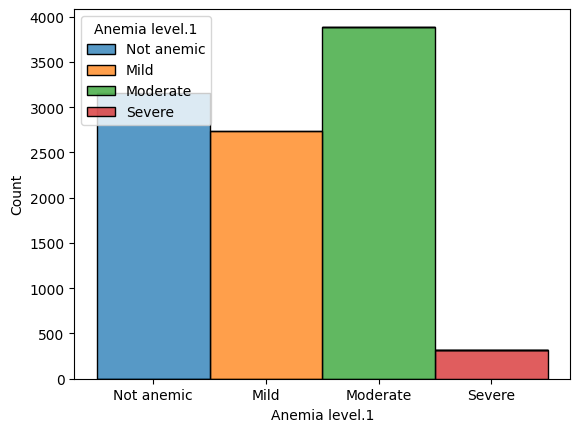

In [15]:
sns.histplot(data=data, x='Anemia level.1', hue='Anemia level.1', multiple='stack')

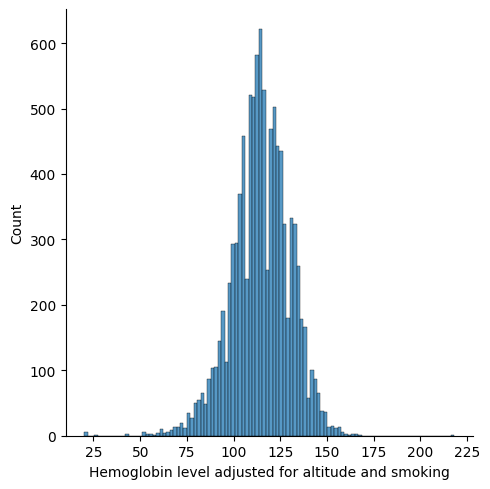

In [16]:
sns.displot(data['Hemoglobin level adjusted for altitude and smoking'])

<Axes: >

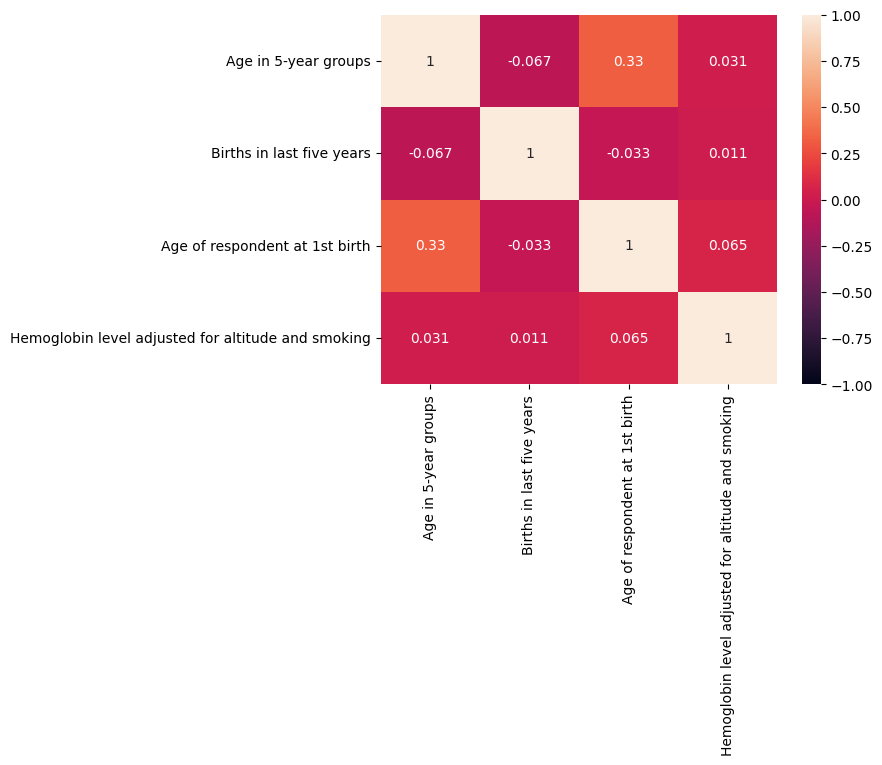

In [17]:
sns.heatmap(data.select_dtypes('number').corr(), annot=True, vmin=-1, vmax=1)

<Axes: xlabel='Anemia level.1', ylabel='Wealth index combined'>

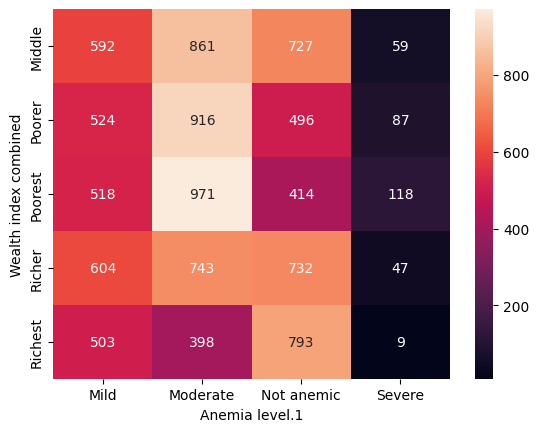

In [18]:
sns.heatmap(pd.crosstab(data['Wealth index combined'], data['Anemia level.1']), annot=True, fmt='d')

### Change categorical's colums datatype into categorical type in pandas

In [19]:
for category in categorical_columns:
    data[category] = data[category].astype('category')
data[label_column] = data[label_column].astype('category')

for categorical in categorical_columns:
    print(data[categorical].cat.categories, categorical)
print(data[label_column].cat.categories, "Label")

Index(['Rural', 'Urban'], dtype='object') Type of place of residence
Index(['Higher', 'No education', 'Primary', 'Secondary'], dtype='object') Highest educational level
Index(['Middle', 'Poorer', 'Poorest', 'Richer', 'Richest'], dtype='object') Wealth index combined
Index(['No', 'Yes'], dtype='object') Have mosquito bed net for sleeping (from household questionnaire)
Index(['No', 'Yes'], dtype='object') Smokes cigarettes
Index(['Living with her', 'Staying elsewhere'], dtype='object') Currently residing with husband/partner
Index(['No', 'Yes'], dtype='object') Had fever in last two weeks
Index(['No', 'Yes'], dtype='object') Taking iron pills, sprinkles or syrup
Index(['Mild', 'Moderate', 'Not anemic', 'Severe'], dtype='object') Label


### Encode categorical type with it number codes and convert it to Tensor

In [20]:
categorical_np = [data[i].cat.codes.values for i in categorical_columns]
categorical_data = np.stack(categorical_np, 1)
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[1, 3, 4, 1, 0, 0, 0, 0],
        [1, 0, 4, 1, 0, 0, 0, 0],
        [1, 3, 4, 1, 0, 0, 0, 1],
        [1, 3, 4, 1, 0, 0, 0, 1],
        [1, 0, 4, 1, 0, 0, 0, 0],
        [1, 0, 4, 1, 0, 0, 0, 1],
        [1, 0, 4, 1, 0, 0, 0, 0],
        [1, 0, 4, 1, 0, 0, 0, 0],
        [1, 3, 4, 1, 0, 0, 0, 1],
        [1, 3, 4, 1, 0, 0, 0, 1]])

### Convert numerical columns to Tensor

In [21]:
numerical_data = np.stack([data[i].values for i in numerical_columns], 1)
numerical_data = torch.tensor(numerical_data, dtype=torch.float)
numerical_data[:10]

tensor([[ 27.,   1.,  25.,  95.],
        [ 32.,   1.,  30., 113.],
        [ 37.,   2.,  32., 121.],
        [ 22.,   1.,  19., 108.],
        [ 27.,   1.,  24., 116.],
        [ 22.,   2.,  19., 118.],
        [ 22.,   2.,  19., 118.],
        [ 27.,   2.,  22., 134.],
        [ 27.,   2.,  22.,  95.],
        [ 27.,   2.,  22.,  95.]])

### Convert output label into Tensor

In [22]:
outputs = torch.tensor(data[label_column].cat.codes.values).flatten()
outputs[:10]

tensor([2, 2, 0, 2, 0, 1, 2, 2, 1, 0], dtype=torch.int8)

### Check correctness of dimension

In [23]:
categorical_data.shape, numerical_data.shape, outputs.shape

(torch.Size([10112, 8]), torch.Size([10112, 4]), torch.Size([10112]))

### Split the data into trainset and testset

In [24]:
total_records = data.shape[0]
test_records = int(total_records * .2) # 20% of the data for testing
train_records = total_records - test_records # 80% of the data for training

categorical_train_data = categorical_data[:train_records]
categorical_test_data = categorical_data[train_records:]
numerical_train_data = numerical_data[:train_records]
numerical_test_data = numerical_data[train_records:]
train_label = outputs[:train_records]
test_label = outputs[train_records:]

print(categorical_train_data.shape, categorical_test_data.shape)
print(numerical_train_data.shape, numerical_test_data.shape)
print(train_label.shape, test_label.shape)

torch.Size([8090, 8]) torch.Size([2022, 8])
torch.Size([8090, 4]) torch.Size([2022, 4])
torch.Size([8090]) torch.Size([2022])


## Training

### Define network topology

In [25]:
class Model(nn.Module):

    def __init__(self,num_categorical_cols, num_numerical_cols, output_size, layers, p=0.4):
        super().__init__()
        self.batch_norm_num = nn.BatchNorm1d(num_numerical_cols)

        all_layers = []
        input_size = num_categorical_cols + num_numerical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))

        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical, x_numerical):
        x_numerical = self.batch_norm_num(x_numerical)
        x = torch.cat([x_categorical, x_numerical], 1)
        x = self.layers(x)
        return x 

### Select hidden layer size and instantiate the model

In [26]:
hidden_layers = [200,100,50]
class_count = int(data[label_column].cat.codes.nunique())
model = Model(categorical_data.shape[1], numerical_data.shape[1], class_count, hidden_layers, p=0.5)
print(model)

Model(
  (batch_norm_num): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


### Move all Tensor into MPS (Apple silicon) device for GPU acceleration

In [27]:
if torch.backends.mps.is_available():
    print ("MPS device found.")
else:
    print("MPS device not found.")

mps_device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

model.to(mps_device)
categorical_train_data = categorical_train_data.to(mps_device)
numerical_train_data = numerical_train_data.to(mps_device)
categorical_test_data = categorical_test_data.to(mps_device)
numerical_test_data = numerical_test_data.to(mps_device)
train_label = train_label.to(mps_device)
test_label = test_label.to(mps_device)  

MPS device found.


### Create custom dataset for train dataset in batch

In [28]:
class CustomDataset(TensorDataset):
    def __init__(self, x_categorical, x_numerical, y):
        super().__init__(x_categorical, x_numerical, y)
        self.x_categorical = x_categorical
        self.x_numerical = x_numerical
        self.y = y

    def __getitem__(self, index):
        return self.x_categorical[index], self.x_numerical[index], self.y[index]

    def __len__(self):
        return len(self.y)

### Hyper parameter

In [29]:
train_dataset = CustomDataset(categorical_train_data, numerical_train_data, train_label)
train_loader = DataLoader(dataset=train_dataset, batch_size=1000, shuffle=True)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 100

### The traning loop

Epoch:   1 Batch: 0 Loss: 1.6030049324035645
Epoch:   1 Batch: 4 Loss: 1.5058327913284302
Epoch:   1 Batch: 8 Loss: 1.4054087400436401
Epoch:   1 Loss: 1.52036810
Epoch:  26 Batch: 0 Loss: 1.2206737995147705
Epoch:  26 Batch: 4 Loss: 1.2046482563018799
Epoch:  26 Batch: 8 Loss: 1.1511447429656982
Epoch:  26 Loss: 1.19710600
Epoch:  51 Batch: 0 Loss: 1.1820975542068481
Epoch:  51 Batch: 4 Loss: 1.1533581018447876
Epoch:  51 Batch: 8 Loss: 1.0536178350448608
Epoch:  51 Loss: 1.14645851
Epoch:  76 Batch: 0 Loss: 1.149246096611023
Epoch:  76 Batch: 4 Loss: 1.1450221538543701
Epoch:  76 Batch: 8 Loss: 1.1194794178009033
Epoch:  76 Loss: 1.15216792
Final Epoch: 100 Loss: 1.1483019590


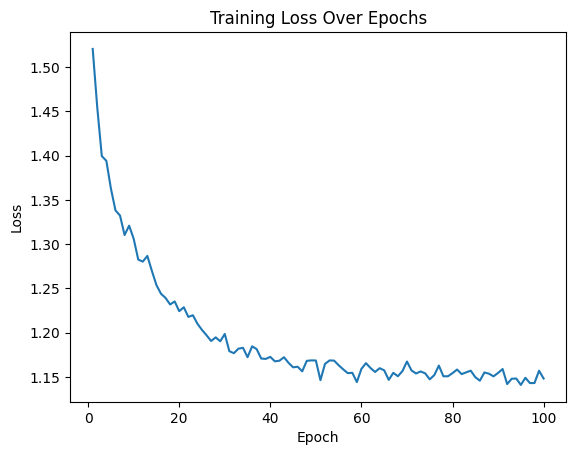

In [30]:
model.train()
aggregated_losses = []

for epoch in range(1, epochs + 1):
    epoch_loss = []
    for batch_idx, (categorical, numerical, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        pred = model(categorical, numerical)
        loss = loss_function(pred, labels)
        epoch_loss.append(loss.item())
        if epoch % 25 == 1 and batch_idx % 4 == 0:
            print(f'Epoch: {epoch:3} Batch: {batch_idx} Loss: {loss.item()}')
        loss.backward()
        optimizer.step()  
    
    mean_epoch_loss = torch.tensor(epoch_loss).mean()
    aggregated_losses.append(mean_epoch_loss)

    if epoch % 25 == 1:
        print(f'Epoch: {epoch:3} Loss: {mean_epoch_loss:10.8f}')

print(f'Final Epoch: {epoch:3} Loss: {mean_epoch_loss:10.10f}')

# Plotting
plt.plot(range(1, epochs + 1), aggregated_losses)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Validation

### Model evaluation

In [31]:
with torch.no_grad():
    model.eval()
    eval = model(categorical_test_data, numerical_test_data)
    loss = loss_function(eval, test_label)
    print(f'Loss: {loss:.8f}')


Loss: 1.12460351


In [32]:
print(eval[:5])
eval = np.argmax(eval.detach().cpu(), axis=1)
print(eval[:5])

tensor([[ 0.5035,  0.6068,  0.7278, -2.3936],
        [ 0.3639,  0.7821,  0.3970, -2.2475],
        [ 0.7475,  0.6715,  1.1157, -2.9074],
        [ 0.5700,  0.5902,  0.8608, -2.5201],
        [ 0.4195,  0.6383,  0.6249, -2.4236]], device='mps:0')
tensor([2, 1, 2, 2, 1])


### Report performance

In [33]:
test_label = test_label.detach().cpu()
print(confusion_matrix(test_label,eval))
print("--------------------------------------------------------------------------------")
print(classification_report(test_label,eval))
print("--------------------------------------------------------------------------------")
print(f"accuracy: {accuracy_score(test_label, eval)*100} %")

[[  0 202 364   0]
 [  0 356 331   0]
 [  0 182 548   0]
 [  0  24  15   0]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       566
           1       0.47      0.52      0.49       687
           2       0.44      0.75      0.55       730
           3       0.00      0.00      0.00        39

    accuracy                           0.45      2022
   macro avg       0.23      0.32      0.26      2022
weighted avg       0.32      0.45      0.37      2022

--------------------------------------------------------------------------------
accuracy: 44.70820969337289 %


/Users/ponynie/Developer/Python_Code/IntroDMLabChula/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ponynie/Developer/Python_Code/IntroDMLabChula/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ponynie/Developer/Python_Code/IntroDMLabChula/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

### Inference with unseen data

In [34]:
unseen = pd.read_csv('/Users/ponynie/Developer/Python_Code/IntroDMLabChula/Final_Project/unseen.csv')

unseen.rename(columns={'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)':
    'Hemoglobin level adjusted for altitude and smoking'}, inplace=True)
unseen.rename(columns={'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)':
    'Hemoglobin level adjusted for altitude'}, inplace=True)

unseen['Age in 5-year groups'] = unseen['Age in 5-year groups'].apply(lambda x: sum(map(int,x.split('-')))/2)
unseen.drop(columns=['When child put to breast', 
                     'Hemoglobin level adjusted for altitude', 
                     'Current marital status'],inplace=True)

categorical_columns = ['Type of place of residence', 
                       'Highest educational level', 
                       'Wealth index combined', 
                       'Have mosquito bed net for sleeping (from household questionnaire)', 
                       'Smokes cigarettes', 'Currently residing with husband/partner', 
                       'Had fever in last two weeks', 
                       'Taking iron pills, sprinkles or syrup']

numerical_columns = ['Age in 5-year groups', 
                     'Births in last five years', 
                     'Age of respondent at 1st birth', 
                     'Hemoglobin level adjusted for altitude and smoking']

for category in categorical_columns:
    unseen[category] = unseen[category].astype('category')
categorical_np = [unseen[i].cat.codes.values for i in categorical_columns]
categorical_data = np.stack(categorical_np, 1)
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
numerical_data = np.stack([unseen[i].values for i in numerical_columns], 1)
numerical_data = torch.tensor(numerical_data, dtype=torch.float)

model.to('cpu')
model.eval()
with torch.no_grad():
    logit = model(categorical_data, numerical_data)
    infer = np.argmax(logit, axis=1)
    logit = logit.numpy()
    infer = infer.numpy()
    unseen['Prediction'] = infer
    unseen['confidence 0'] = logit[:,0]
    unseen['confidence 1'] = logit[:,1]
    unseen['confidence 2'] = logit[:,2]
    unseen['confidence 3'] = logit[:,3]
    label_mapping = {0: 'Mild', 1: 'Moderate', 2: 'Not anemic', 3: 'Severe'}
    unseen['Prediction'] = unseen['Prediction'].map(label_mapping) 
    unseen.to_csv('prediction_unseen.csv', index=False)

    
    